<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/K%20Nearest%20Neighbor%20(KNN)%20Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K Nearest Neighbor**

Gene expression levels depend on the balance between the rate of mRNA production (involving transcription and pre-mRNA processing) and its degradation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

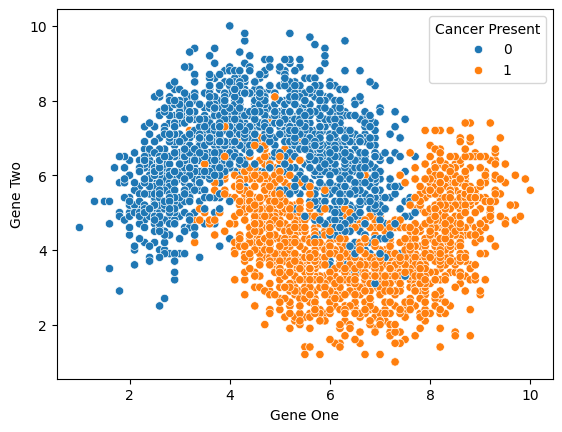

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
#

(3.0, 10.0)

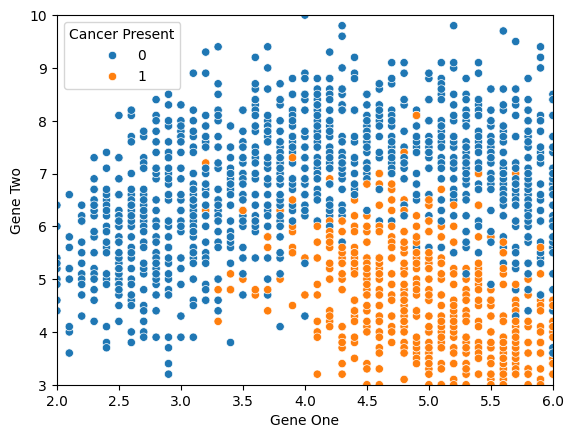

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)

#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [ ]:
df.dtypes

,0
Gene One,float64
Gene Two,float64
Cancer Present,int64


In [ ]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


**Train | Test Split and Scaling Data**


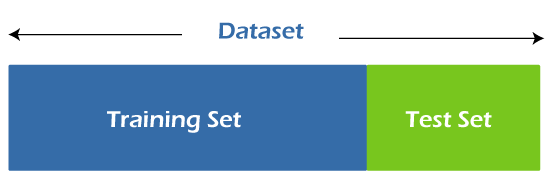

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
x=df.drop('Cancer Present',axis=1)  #axis use for columns
x.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [ ]:
y=df['Cancer Present']
y.head()

,Cancer Present
0,1
1,0
2,1
3,0
4,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print("X Traning ",X_train.shape)
print("X Testing ",X_test.shape)
print("Y Traning ",y_train.shape)
print("Y Testing ",y_test.shape)

X Traning  (2100, 2)
X Testing  (900, 2)
Y Traning  (2100,)
Y Testing  (900,)


In [ ]:
print("X Traning ",X_train)

X Traning        Gene One  Gene Two
611        6.4       6.6
530        5.2       2.5
2787       4.4       3.9
49         5.0       4.6
1883       2.9       5.0
...        ...       ...
1638       4.2       5.8
1095       6.6       4.7
1130       5.4       3.7
1294       5.5       7.2
860        8.7       5.0

[2100 rows x 2 columns]


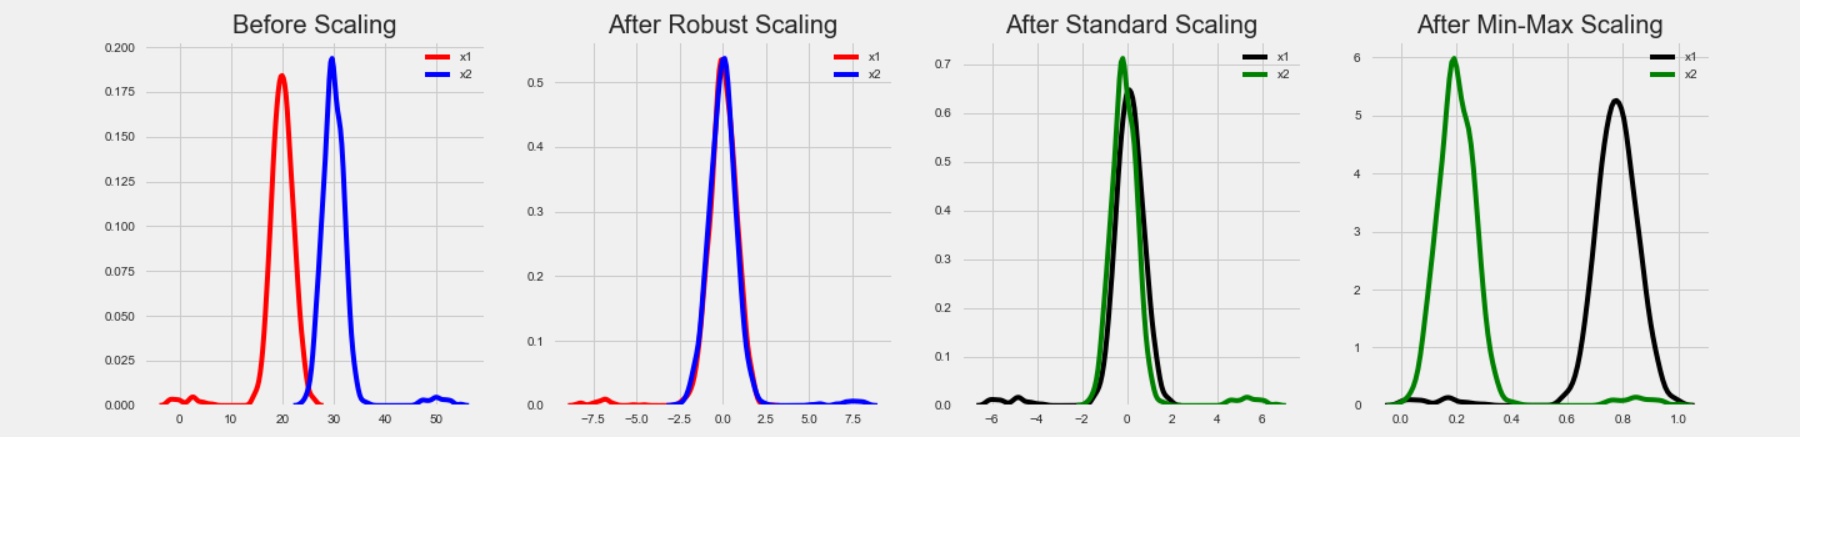

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_X_Train=scaler.fit_transform(X_train)
scaled_X_Test=scaler.transform(X_test)


In [ ]:
print("Scaled X Train ",scaled_X_Train)
print("Scaled X Test",scaled_X_Test)

Scaled X Train  [[ 0.4441672   0.7149185 ]
 [-0.21108473 -1.66786641]
 [-0.64791935 -0.85423254]
 ...
 [-0.10187607 -0.97046595]
 [-0.04727175  1.06361873]
 [ 1.70006673 -0.21494878]]
Scaled X Test [[ 1.15402346 -0.73799913]
 [-0.1564804  -1.49351629]
 [ 1.80927539 -0.67988242]
 ...
 [ 1.4270451   0.59868509]
 [ 1.15402346 -0.3892989 ]
 [-1.03014964  1.8772526 ]]


**Use KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_X_Train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Understanding  KNN and choosing K Value**

In [ ]:
full_test=pd.concat([X_test,y_test],axis=1)
full_test.head()

,Gene One,Gene Two,Cancer Present
1801,7.7,4.1,1
1190,5.3,2.8,1
1817,8.9,4.2,1
251,3.3,5.7,0
2505,4.7,7.3,0


In [ ]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

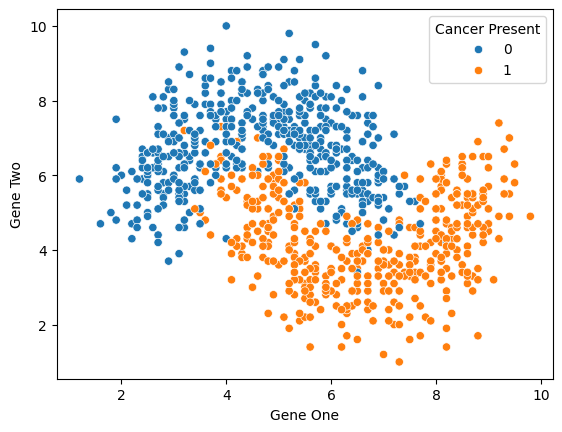

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=full_test)

In [ ]:
full_train=pd.concat([X_train,y_train],axis=1)
full_train.head()

,Gene One,Gene Two,Cancer Present
611,6.4,6.6,0
530,5.2,2.5,1
2787,4.4,3.9,1
49,5.0,4.6,1
1883,2.9,5.0,0


In [ ]:
len(full_train)

2100

<Axes: xlabel='Gene One', ylabel='Gene Two'>

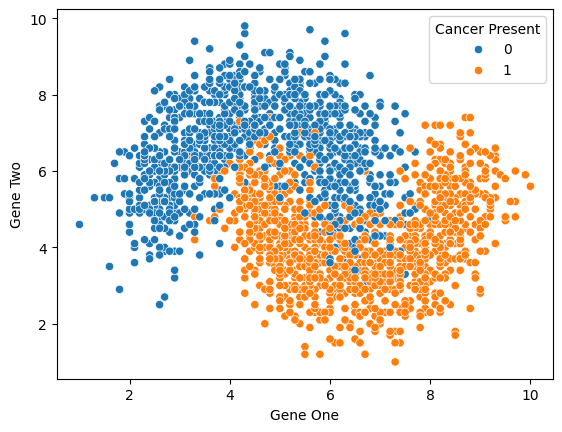

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=full_train)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=knn_model.predict(scaled_X_Test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8911111111111111